In [1]:
%matplotlib inline

# Introduction to Deep Learning with Keras and TensorFlow


Based on work from Daniel Moser and adapted by Frank Trollmann


This notebook will walk you through the process of creating artificial neural networks and convolutional neural networks for the MNIST dataset.

This notebook is an adadptation of the workbook from Daniel Moser located [here](https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb). Adaptations include bugfixes, integration of cells for the sake of brewity and addition of tasks. 

## The Task for the AI

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

In [2]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

from sklearn.metrics import confusion_matrix


## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [3]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

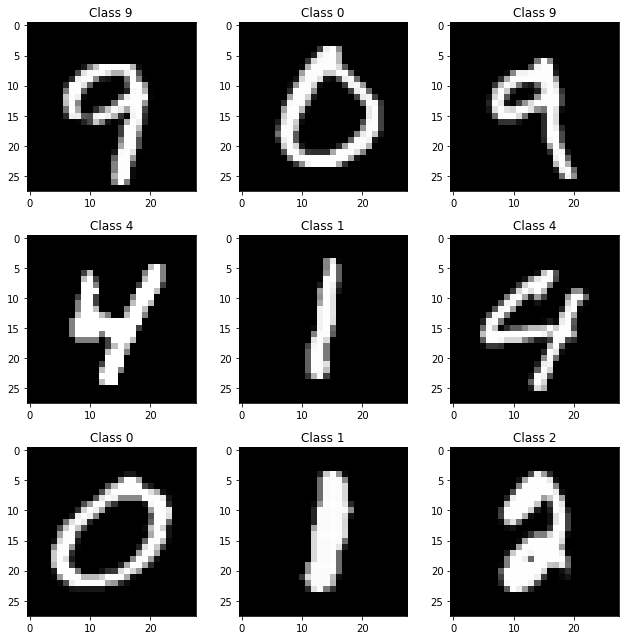

In [4]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0   72  242  157   45    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0   16  169  253  254  254  232   17    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0  131  254  254  254  254  254  135    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0   78  253  254  254  254  254  254  236   17    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0   37  239  254  254  254  254  160  202  254  163    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0  

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

*Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also likely takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!*

# Artificial Neural Networks

The first model we will try is a fully connected artificial neural network. Before we define and traing this model we have to restructure our data to fit the input and output of this model.

## Data Formatting

Artificial Neural Networks expect their input to be vectors. This means we will convert the 28 x 28 matrix into a 784-length vector.Each image needs to be  reshaped (or flattened) into a vector. 

We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

We also modify our classes (unique digits) to be in the one-hot format, i.e., a vector of numbers where each number represents one class. 

In [6]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

nb_classes = 10                       # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes) # reshape output using one-hot encoding
Y_test = np_utils.to_categorical(y_test, nb_classes)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Training output shape", Y_train.shape)
print("Testing output shape", Y_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
Training output shape (60000, 10)
Testing output shape (10000, 10)


## Building a 3-layer fully connected network (FCN)


Next we build a fully connected neural network with the following dimensions:

- Input: 784
- 1: Fully Connected Layer - 512 Neurons
- 2: Fully Connected Layer - 512 Neurons
- Output: 10 Neurons

We will compile the model using the Adam optimizer using categoical cross entropy as loss metric

In [7]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()
# 1st layer
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 2nd layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## Train the model!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 13s 25ms/step - loss: 0.2557 - accuracy: 0.9222
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1009 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0721 - accuracy: 0.9773
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0576 - accuracy: 0.9812
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0461 - accuracy: 0.9851


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Evaluate Model

Next we evaluate how well the model is working.
We'll evaluate based on the test set to have an unbiased benchmark of our model.

We'll also plot a confusion matrix to inspect which classes are confused with others. 

313/313 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9787
Test score: 0.07503359019756317
Test accuracy: 0.9786999821662903


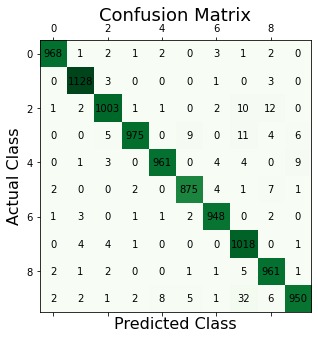

In [9]:
# print test score
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

#calculate confusion matrix
Y_pred = model.predict(X_test)
Y_test_classes = np.argmax(Y_test,axis=1)
Y_pred_classes = np.argmax(Y_pred,axis=1)
cm = confusion_matrix(Y_test_classes, Y_pred_classes)

#create and plot confusion matrix figure content
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Greens)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Class', fontsize=16)
plt.ylabel('Actual Class', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

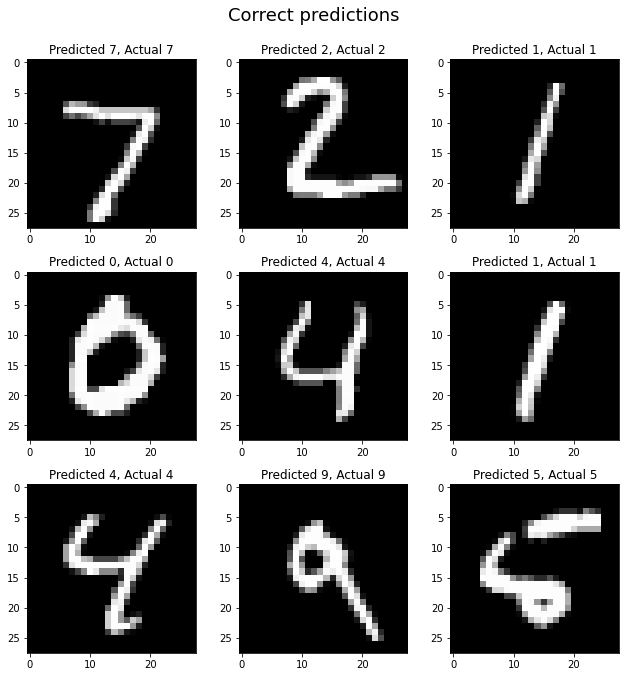

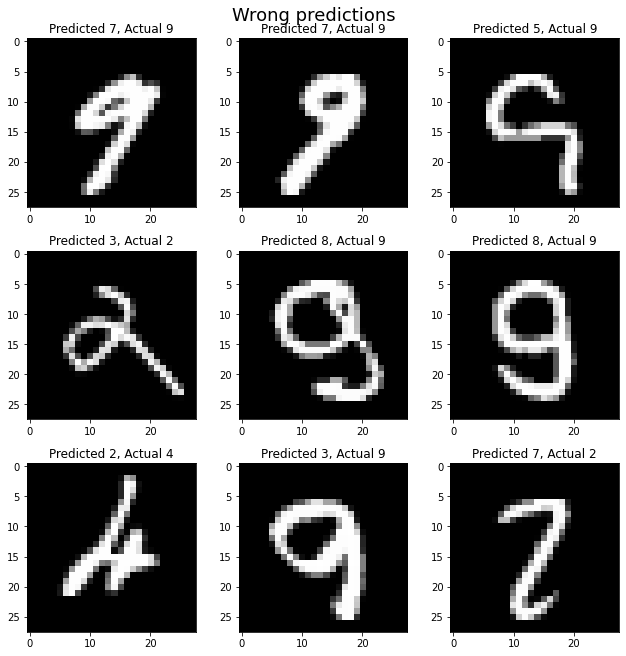

In [10]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.

# calculate predicted classes to compare to actual classes
# BUGFIX: updated code to work with current version of keras
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred,axis=1)


# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

# plot examples of items we got right
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle('Correct predictions\n', fontsize=18,verticalalignment="bottom")
plt.tight_layout()

print("\n\n")
# plot examples of items we got wrong  
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.suptitle('Wrong predictions', fontsize=18,verticalalignment="bottom")
plt.tight_layout()

# Convolutional Neural Networks

Let's try solving the same task using a convolutional neural network. As before we need to do some data formatting first and then can go on to define and train our network. 

But before we do that we need some additional imports.

In [11]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
# BUGFIX!
from keras.layers import BatchNormalization

## Data Formatting

Convolutional neural networks can work with two-dimensional input data. This means we need to preprocess our data differently than for artificial neural networks. Let's reload our data and preprocess it.

In [12]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Input Formatting
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

# one-hot encoding of output
nb_classes = 10 # number of unique digits
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#print data shapes
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Training output shape", Y_train.shape)
print("Testing output shape", Y_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)
Training output shape (60000, 10)
Testing output shape (10000, 10)



## Building a Convolutional Neural Network

Now we build up the convolutional model. The layers here are as follows:
- Input Layer: 28 x 28 x 1 images
- 1: Convolutional Layer - 8 3x3 kernels
- 2: Convolutoinal Layer - 8 3x3 kernels
- 3: Max Pooling Layer   - 2x2
- 4: Convolutional Layer - 16 3x3 kernels
- 5: Convolutional Layer - 16 3x3 kernels
- 6: Max Pooling Layer   - 2x2
- Flattening Layer
- 7: Fully Connected Layer - 64 neurons
- Output Layer: 10 neurons



In [13]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(8, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation  5408
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(8, (3, 3)))                         # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation 4608

convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel     1.152
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(16,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation   1600
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(16, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation    1024

convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)

# Flatten as prep for fully connected Layer
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(64))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

model.summary()

# we'll use the same optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 8)        32        
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 8)        32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 8)        

## Train the model!

For training we'll do some data augmentation by generating random samples from our training data. Data augmentation prevents overfitting by slightly changing the data randomly. For this purpose we'll set data generators for training and test data before the training.

In [14]:
# create data generators for training and test data
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

# We can then feed our augmented data in batches
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)


# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 59s 125ms/step - loss: 0.4474 - accuracy: 0.8722 - val_loss: 0.0924 - val_accuracy: 0.9756
Epoch 2/5
468/468 [==============================] - 60s 128ms/step - loss: 0.1330 - accuracy: 0.9613 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 3/5
468/468 [==============================] - 59s 126ms/step - loss: 0.0924 - accuracy: 0.9724 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 4/5
468/468 [==============================] - 59s 127ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 5/5
468/468 [==============================] - 59s 126ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0381 - val_accuracy: 0.9867


## Evaluate Model

Next we evaluate how well the model is working.
We'll evaluate based on the test set to have an unbiased benchmark of our model.

We'll also plot a confusion matrix to inspect which classes are confused with others. 

313/313 [==============================] - 4s 11ms/step - loss: 0.0381 - accuracy: 0.9867
Test score: 0.03808475658297539
Test accuracy: 0.9866999983787537


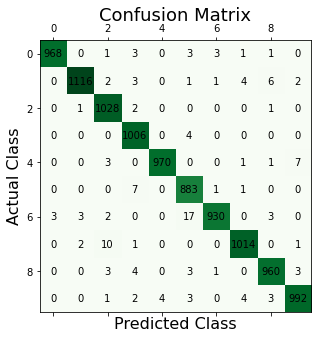

In [15]:
# print score and accuracy of test set
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

#calculate confusion matrix
Y_pred = model.predict(X_test)
Y_test_classes = np.argmax(Y_test,axis=1)
Y_pred_classes = np.argmax(Y_pred,axis=1)
cm = confusion_matrix(Y_test_classes, Y_pred_classes)

#create and plot confusion matrix figure content
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Greens)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Class', fontsize=16)
plt.ylabel('Actual Class', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Visualization

One of the interesting things you can do with CNNs is to plot the patterns each layer is looking for. Let's do that here.

In [16]:
from keras import backend as K

# choose any image to want by specifying the index
img = X_test[3]
img = np.expand_dims(img, axis=0) # Keras requires the image to be in 4D, so we add an extra dimension to it.

# Not important to understand how this function work -- It just plots a convolution layer
def visualize(layer):
    # BUGFIX: i had to remove the first input dimension as it was giving keras backend trouble. 
    convout1_f = K.function(model.inputs, [layer.output])
    
    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')



Shape of conv: (26, 26, 8)


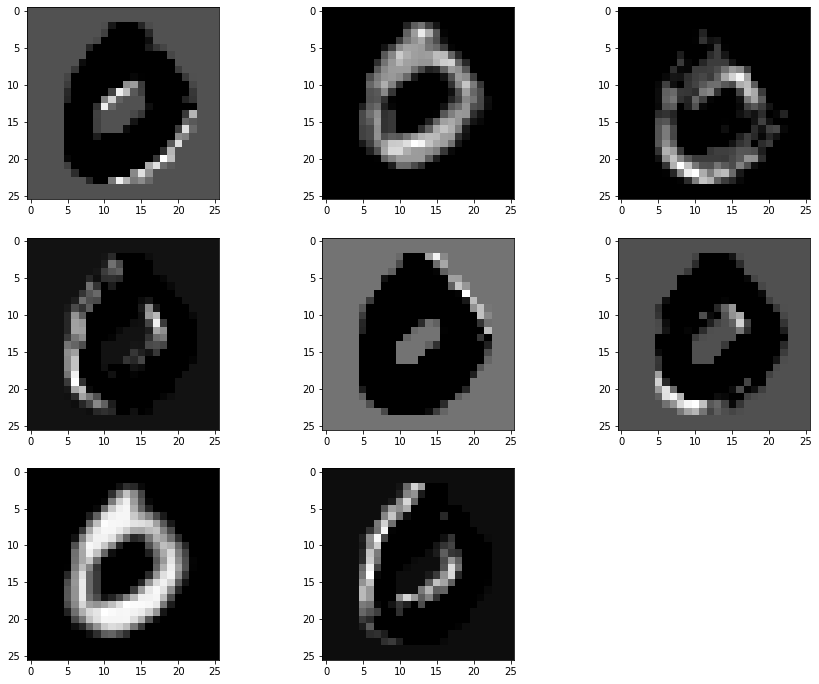

In [17]:
visualize(convLayer01) # visualize first set of feature maps

Shape of conv: (12, 12, 8)


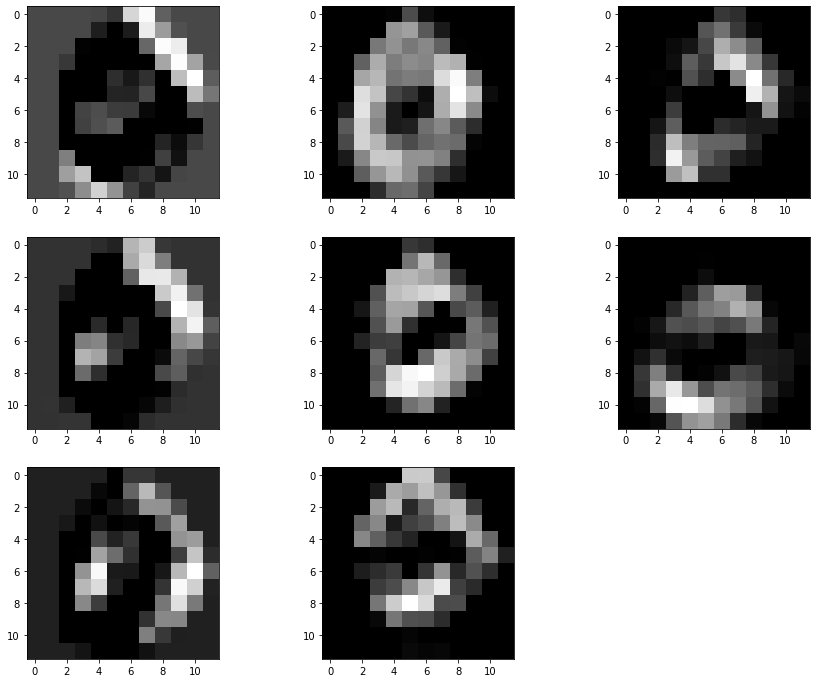

In [18]:
visualize(convLayer02) # visualize second set of feature maps

Shape of conv: (10, 10, 16)


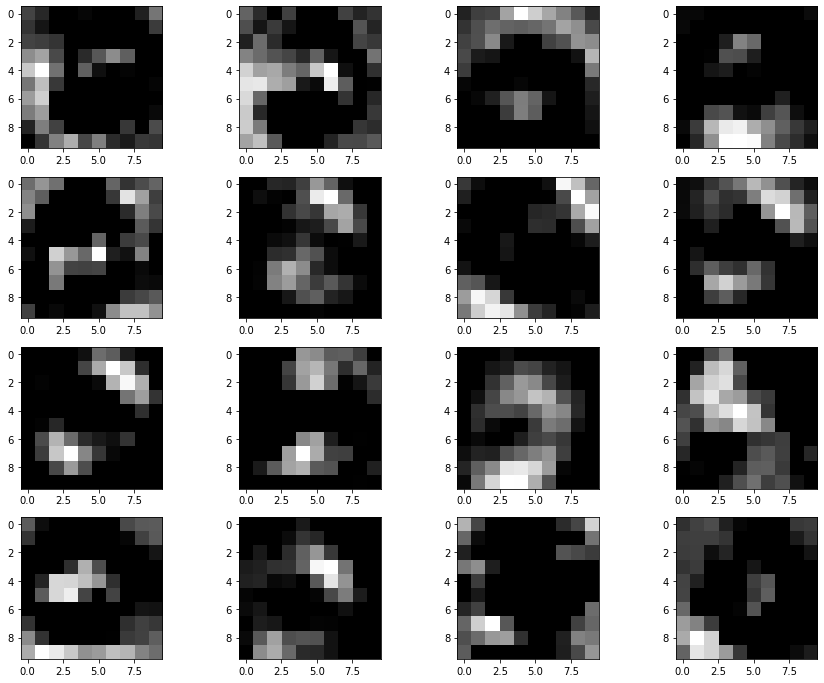

In [19]:
visualize(convLayer03)# visualize third set of feature maps

Shape of conv: (4, 4, 16)


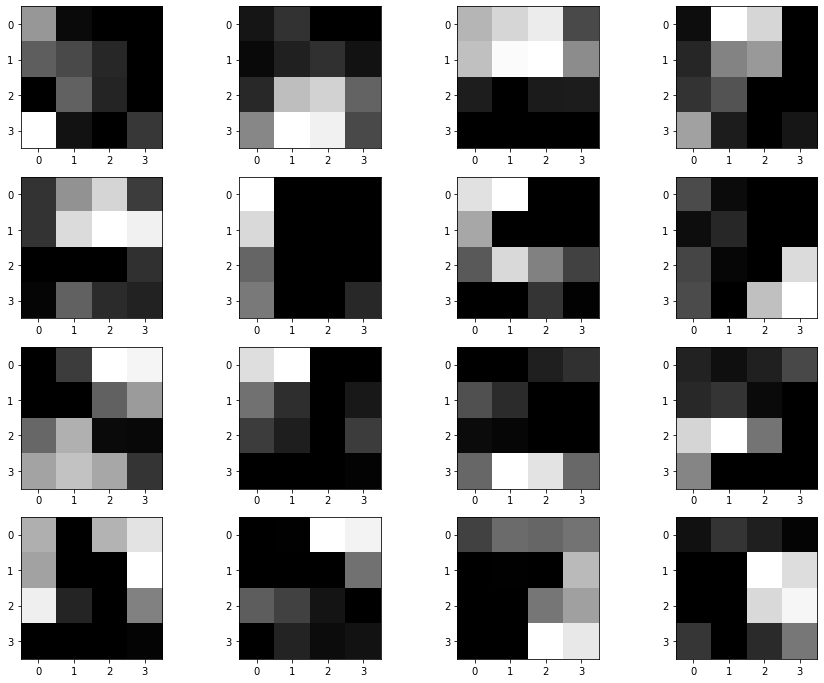

In [20]:
visualize(convLayer04)# visualize fourth set of feature maps